# Get the embeddings
1. [x] Load Images
2. [x] Save Faces
3. [ ] Save Embeddings
4. [ ] Face Recognition with SVM

In [1]:
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import os

import random
from math import ceil

# Saving Faces

In [2]:
# create the new directory
if not os.path.exists('faces'):
    os.mkdir('faces')

for folder in os.listdir('images'):
    print('Folder:', folder)
    if not os.path.isdir(os.path.join('images', folder)):
        continue
    i = 0
    for image_name in os.listdir(os.path.join('images', folder)):
        # check if it's a file or not
        print(f'Saving:{image_name}')
        if not os.path.isfile(os.path.join('images', folder, image_name)):
            print('Not Saved')
            continue
        
        # load the image
        image = face_recognition.load_image_file(os.path.join('images', folder, image_name))
        # get the face(s) in the images
        face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model='cnn')
        
        for face_location in face_locations:
            top, right, bottom, left = face_location

            face_image = image[top:bottom, left:right]
            pil_image = Image.fromarray(face_image)

            # create the new directory for each person
            if not os.path.exists(os.path.join('faces', folder)):
                os.mkdir(f'faces/{folder}')
            # Save Images in sub-directories
            pil_image.save(f'faces/{folder}/{i}.png')
            i+=1

Folder: links.txt
Folder: insta_10
Saving:84527678_2289122761390788_2180622499544324707_n.jpg
Saving:88267594_510437612999219_2950989089778200068_n.jpg
Saving:75372339_2473241366252482_8309019585057476688_n.jpg
Saving:85012141_561254824738619_7723553045457052916_n.jpg
Saving:89716141_2952258411501858_6810529755396111268_n.jpg
Saving:82649967_270644783936816_8090953522748566223_n.jpg
Folder: mohamed_eid
Saving:67098483_403459666969857_7598024888494801636_n.jpg
Saving:70449969_197299054600870_690521787659199358_n.jpg
Saving:83387797_4224097534282669_8293964875916709713_n.jpg
Saving:66426819_132615961277932_6342701411267693274_n.jpg
Saving:83732945_2636246256606805_457157923361145276_n.jpg
Saving:85143295_658152314989886_327455550257287420_n.jpg
Folder: moaz
Saving:IMG_20200110_093018.jpg
Saving:IMG-20200101-WA0042.jpg
Saving:FB_IMG_1582052536880.jpg
Saving:IMG_20190906_191900_918.jpg
Saving:71519547_551077692331723_1857143274674847744_n (1).jpg
Saving:Screenshot_2020-01-27-22-03-36-565_c

In [3]:
def shuffle(x):
    return sorted(x, key=lambda x:random.random())

In [17]:
def show_random_faces(num=5):
    images = []
    i = 0 
    if os.path.exists('faces'):
        for folder in shuffle(os.listdir('faces')):
            if os.path.isdir(os.path.join('faces', folder)) and num!=i:
                for image in shuffle(os.listdir(os.path.join('faces', folder))):
                    if os.path.isfile(os.path.join('faces', folder, image)):
                        images.append([folder, image])
                        i+=1
                        break
    if num in [1, 2, 3]:
        fig = plt.figure(figsize=(4, 4))
    else:
        fig = plt.figure(figsize=(num, num))
    s = ceil(num/2)
    if s == 1:s=2
    for i in range(1, s*s+1):
        if i-1==len(images):break
        img = plt.imread(f'faces/{images[i-1][0]}/{images[i-1][1]}')
        fig.add_subplot(s, s, i)
        plt.title(images[i-1][0])
        plt.imshow(img)
    fig.tight_layout()
    plt.show()

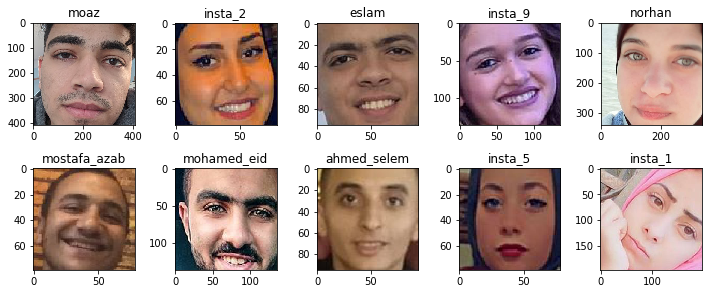

In [22]:
show_random_faces(10)

# Saving Embeddings

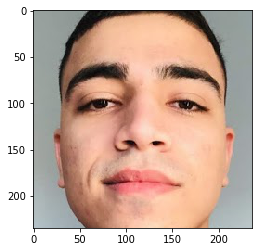

In [27]:
img = face_recognition.load_image_file('faces/moaz/4.png')
plt.imshow(img)

In [32]:
img_encoding = face_recognition.face_encodings(img)[0]

In [35]:
len(img_encoding)

128

# Face Recognition with SVM